# Machine Learning - Algoritmo de classificação K-Nearest Neighbors 
### João Victor Guedes
#### 05 de Fevereiro, 2019

##### Apresentação

Neste pequeno projeto de Machine Learning, iremos focar no algoritmo de classificação K-Nearest Neighbors e algumas técnicas de pré-processamento dos dados para que possamos aplicá-lo de forma concisa e avaliar o seu poder de desempenho e estimativa.


## Antes de começar
Tecnologias utilizadas:
- Phyton 3.7.0
- Jupyer Notebook 4.4.0
- Pandas 0.23.4
- NumPy 1.15.1
- Matplotlib 2.2.3

## Resumo do algoritmo

K-Nearest Neighbors é um algoritmo de classificação que não possui dados para treinamento de aprendizado, diferentemente de muitos outros, ele classifica usando os dados na base da similaridade.
Essa similaridade não é feita de modo comparativo, mas sim por meio de um cálculo matemático para medir a distância entre os pontos já classsificados.

### Como é feito?

- O algoritmo recebe uma entrada X (x1, x2, x3...xn) a ser classificada.
- Calcula-se a distância Euclidiana (podem ser usados vários outros métodos: Manhattan, Minkowski; porém essa é a mais tradicional), entre o dado de entrada e os dados já classificados.
- Para que não calcule a distância entre todos os pontos existentes na base é passado um parâmetro 'K', que possui o comportamento de delimitador de distância máxima dos pontos a partir do ponto a ser classificado.
- Obtém-se valores das menores distâncias.
- Observa-se as classes de cada ponto que possuem as menores distâncias.
- Contabiliza-se as classes que surgiram na observação.
- A classe que for mais contabilizada será a classificação do novo ponto.

**Para mais detalhes, segue um link para referência: [K-Nearest Neighbors](https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)**.

## Começando
O conjunto de dados usado será o **[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)**. Os dados dos vinhos foram coletados em 2009 e cada uma das entradas/linhas representa um vinho branco, sendo 4898 amostras.

In [188]:
#Importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [189]:
#Carregando o Dataframe de vinho branco
df_white = pd.read_csv('winequality-white.csv', sep=';')

#Verificar como está o comportamento da base de dados
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1 - Explorando os Dados
Verificamos as qualidades possíveis para o vinho branco e a quantia de amostra para cada qualidade.

In [190]:
for keys, value in dict(df_white['quality'].value_counts()).items():
    print("Qualidade: {}, Amostras: {} ".format(keys, value))

Qualidade: 6, Amostras: 2198 
Qualidade: 5, Amostras: 1457 
Qualidade: 7, Amostras: 880 
Qualidade: 8, Amostras: 175 
Qualidade: 4, Amostras: 163 
Qualidade: 3, Amostras: 20 
Qualidade: 9, Amostras: 5 


Ao observar a quantia de amostras de cada qualidade, verifica-se que há pouquíssimas amostras para a qualidade 3 e 9, provavelmente haverá problemas no momento da classição pela falta de amostras.

### 1.1 - Verificar correlações

Por que é importante verificar as correlações entre as variáveis do *dataframe*?
Isso pode lhe ajudar em diversos aspectos, por exemplo: No caso do K-Nearest Neighbors (KNN), em que se faz o cálculo da média euclidiana entre a entrada nova e a cada dado do dataframe; Pensando assim, quanto mais características o dado possuir, mais difícil será a classificação, pelo fato de possuir muitas características a serem "comparadas".

**Tipos de correlações?**
- Correlação Positiva : ambas as variáveis mudam na mesma direção.
- Correlação Negativa : as variáveis mudam em direções opostas.
- Correlação Neutra : Nenhuma relação na mudança das variáveis.

Respondida essa questão, o nosso objetivo é tentar identificar as variváveis de correlação neutra em relação à variável **quality**, pois ela é o dado alvo para a classificação dos dados novos.

**Como fazer?**

A técnica usada será Regressão Linear, mas há muitas outras (Correlação de Pearson, Correlação de Spearman etc)



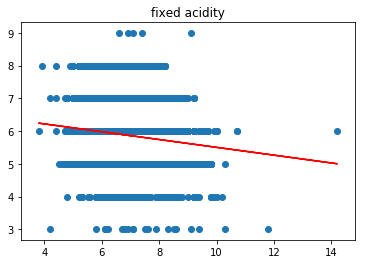

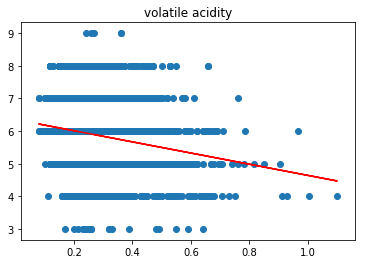

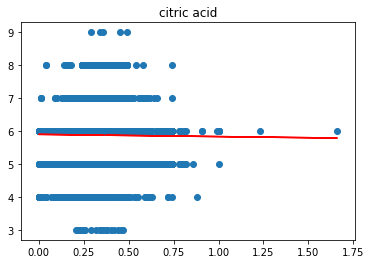

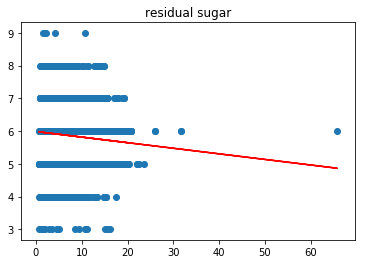

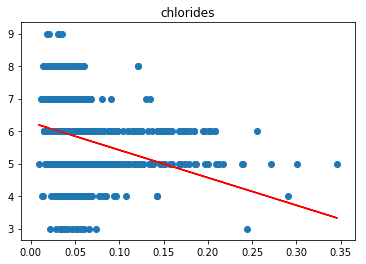

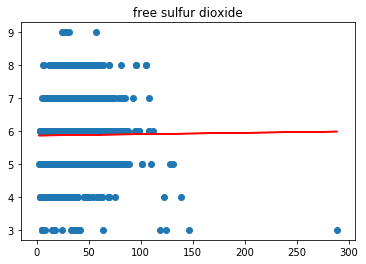

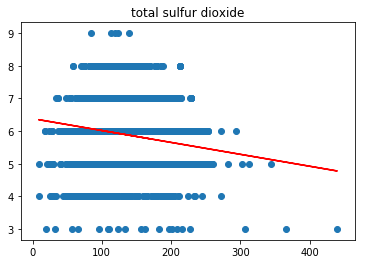

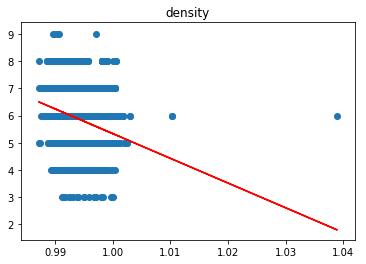

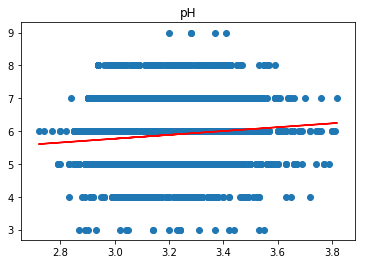

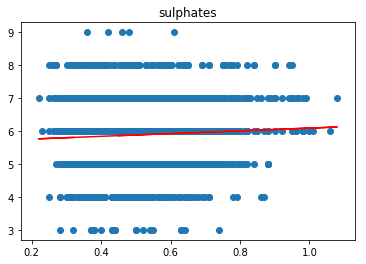

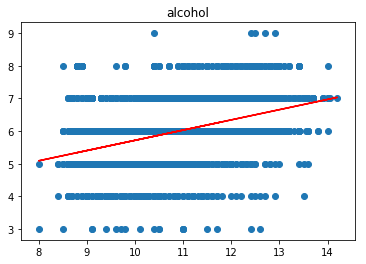

In [191]:
#y é a variável resposta(saída)
y = df_white['quality'].values

### Utilizando uma regressão linear do Scikit-Learn
model_linear = LinearRegression()
for column in df_white:
    #Não selecionamos quality aqui, pois não queremos analisar quality x quality
    if column != 'quality':
        x = df_white[column].values.reshape(-1, 1)
        model.fit(x, y)        
        
        x = df_white[column].values
        fig, ax = plt.subplots()
        fit = py.polyfit(x, y, deg=1)
        ax.plot(x, fit[0] * x + fit[1], color='red')
        plt.title(column)
        ax.scatter(x, y)


Podemos observar os relacionamentos fracos entre a qualidade e o citric acid, free sulfur dioxide e sulphates. Vamos remover essas colunas do dataset.

In [192]:
#X são as variáveis de entrada(fixed acidity, volatile acidity, citric acid...)
X = df_white.drop(columns=['citric acid', 'free sulfur dioxide', 'sulphates'])

### 2 - Implementação
Irei aplicar o KNeighborsClassifier de modo default, que ajustará automaticamente os hiperparâmetros de modo otimizado, mas sinta-se à vontade de fazer testes manuais com os hiperparâmetros.

In [193]:
#Ajustando o modelo com os dados
model = KNeighborsClassifier()
model.fit(X, y)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


Vamos reservar 20% dos dados para fazer o teste de precisão do modelo. A função abaixo **train_test_split** randomiza os dados do seu dataframe para não haver dados viciados e aumentar a generalização. Assim o teste do modelo será mais confiável.

In [196]:
#Iremos pegar apenas os dados de teste X_test (entrada) e y_test (saída esperada)
X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size=0.20, random_state=2)

print("Precisão:", round(model.score(X_test,y_test)*100, 2))

Precisão: 81.94


### Resumo

Neste projeto, pôde-se aprender a importância da exploração dos dados, como aplicar as correlações para que o seu modelo seja melhor e como fazer a implementação do K-Nearest Neighbors por meio da ferramenta sklearn.

Possui alguma pergunta? Entre em contato:
- LinkedIn: https://www.linkedin.com/in/jo%C3%A3o-victor-guedes-2758a214a/
- Email: guedes.joao@outlook.com